In [61]:
from helper_functions import plot_traces_classification_analysis
from preprocessing_transforms import ZeroTimeCorrection, HighPassFilter, LowPassFilter, Iad, RemoveBackground

from glob import glob
import re
import segyio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Display raw tagged data

# Create test.txt and train.txt

In [4]:
all_txt = glob('obj/*txt')

In [5]:
len(all_txt)

229

In [6]:
file_train = open('train.txt', 'w')
file_test = open('test.txt', 'w')

for each_file in glob('obj/*txt'):
    if 'Tunnel' in each_file: # Validation images are from 17th Aug
        file_test.write("data/" + each_file.split('.txt')[0] + ".png" + "\n")
    else:
        file_train.write("data/" + each_file.split('.txt')[0] + ".png" + "\n")

file_train.close()
file_test.close()

# Remove 0 tagged images

# Create final images used to train the model using tagged data

In [62]:
all_txt = glob('tagged_data_rev/*txt')
all_sgy = glob('sgy_data/*.sgy')

In [63]:
len(all_txt)

55

In [64]:
sgy_list_from_text = []

for each_text in all_txt:
    sgy_name = '_'.join(each_text.split('_')[:-4])+'.sgy'
    if sgy_name not in sgy_list_from_text:
        sgy_list_from_text.append(sgy_name)
    
# Running this, we get sgy_list_from_text which contains all the list of sgy files which are used by the tagged txt files

In [65]:
# Verify this manually - Done

sgy_list_from_text

['tagged_data_rev/TunnelNew_64_Random.sgy',
 'tagged_data_rev/TunnelNew_64_S_Scan_1.sgy',
 'tagged_data_rev/TunnelNew_64_2.sgy',
 'tagged_data_rev/TunnelNew_64_S_Scan.sgy',
 'tagged_data_rev/TunnelNew_64_StraightPasses.sgy',
 'tagged_data_rev/Tunnel_64_Xscan.sgy',
 'tagged_data_rev/TunnelNew_64_1.sgy',
 'tagged_data_rev/TunnelNew_64_3.sgy',
 'tagged_data_rev/TunnelNew_64_4.sgy']

In [66]:
pattern = r'([^/]+)_(?:\d+_\d+)__cubic\.txt'

each_split = []

for each_sgy in sgy_list_from_text:
    sgy_name = each_sgy.split('/')[-1][:-4]

    sgy_files = []
    for each_txt in all_txt:
        match = re.search(pattern, each_txt)
        if match:
            if sgy_name == match.group(1):
                sgy_files.append(each_txt)


    splits_per_file = []
    for each_file in sgy_files:
        splits_per_file.append([each_file, each_file.split('_')[-4], each_file.split('_')[-3]])
    each_split.append(splits_per_file)

# So after running this, we will have 
# sgy_list_from_text which contains all unique sgy files and 
# each_split containing which splits were done for that specific sgy file to get the png images

In [67]:
# Verified this manually - Done

for i, each_sgy_file in enumerate(sgy_list_from_text):
    print(f"{each_sgy_file} {len(each_split[i])} \n {each_split[i]} {each_split[i]} \n")

tagged_data_rev/TunnelNew_64_Random.sgy 9 
 [['tagged_data_rev/TunnelNew_64_Random_15470_16563__cubic.txt', '15470', '16563'], ['tagged_data_rev/TunnelNew_64_Random_17221_19235__cubic.txt', '17221', '19235'], ['tagged_data_rev/TunnelNew_64_Random_5836_6470__cubic.txt', '5836', '6470'], ['tagged_data_rev/TunnelNew_64_Random_11954_13067__cubic.txt', '11954', '13067'], ['tagged_data_rev/TunnelNew_64_Random_1954_3294__cubic.txt', '1954', '3294'], ['tagged_data_rev/TunnelNew_64_Random_9357_10113__cubic.txt', '9357', '10113'], ['tagged_data_rev/TunnelNew_64_Random_373_1451__cubic.txt', '373', '1451'], ['tagged_data_rev/TunnelNew_64_Random_7038_7892__cubic.txt', '7038', '7892'], ['tagged_data_rev/TunnelNew_64_Random_3773_5360__cubic.txt', '3773', '5360']] [['tagged_data_rev/TunnelNew_64_Random_15470_16563__cubic.txt', '15470', '16563'], ['tagged_data_rev/TunnelNew_64_Random_17221_19235__cubic.txt', '17221', '19235'], ['tagged_data_rev/TunnelNew_64_Random_5836_6470__cubic.txt', '5836', '6470']

In [68]:
sgy_list_from_text_sgy_data_folder = [x.replace('tagged_data_rev', 'sgy_data') for x in sgy_list_from_text]

In [69]:
def open_sgy_preprocess(file_name):
    with segyio.open(file_name, mode='r+', endian='little', strict=False) as file:
        traces_1 = []
        for i in range(len(file.trace)):
            traces_1.append(file.trace[i])
        traces_1 = np.array(traces_1)
        traces_1 = ZeroTimeCorrection(0)(traces_1, [])[0]
        # traces_1 = RemoveBackground()(traces_1)[0]
        # traces_1 = HighPassFilter(500)(traces_1)[0]
        # traces_1 = LowPassFilter(50)(traces_1)[0]
        # traces_1 = Iad('cubic', 0, 1, -0.5, 0.5)(traces_1)[0]
    return traces_1[:, :250]

In [70]:
each_split[0]

[['tagged_data_rev/TunnelNew_64_Random_15470_16563__cubic.txt',
  '15470',
  '16563'],
 ['tagged_data_rev/TunnelNew_64_Random_17221_19235__cubic.txt',
  '17221',
  '19235'],
 ['tagged_data_rev/TunnelNew_64_Random_5836_6470__cubic.txt', '5836', '6470'],
 ['tagged_data_rev/TunnelNew_64_Random_11954_13067__cubic.txt',
  '11954',
  '13067'],
 ['tagged_data_rev/TunnelNew_64_Random_1954_3294__cubic.txt', '1954', '3294'],
 ['tagged_data_rev/TunnelNew_64_Random_9357_10113__cubic.txt',
  '9357',
  '10113'],
 ['tagged_data_rev/TunnelNew_64_Random_373_1451__cubic.txt', '373', '1451'],
 ['tagged_data_rev/TunnelNew_64_Random_7038_7892__cubic.txt', '7038', '7892'],
 ['tagged_data_rev/TunnelNew_64_Random_3773_5360__cubic.txt', '3773', '5360']]

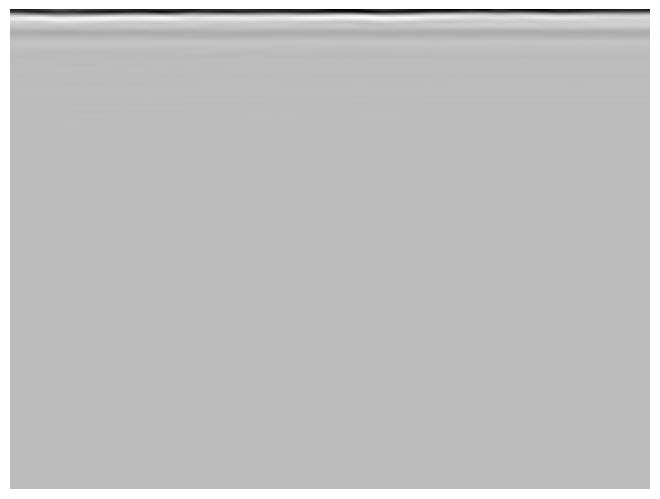

In [71]:
# Running this will create final images and final txt files required for training the model and put it inside folder 'obj'

for i in range(len(sgy_list_from_text_sgy_data_folder)):

    traces = open_sgy_preprocess(sgy_list_from_text_sgy_data_folder[i])
    # print(sgy_list_from_text_sgy_data_folder[i])

    for sub_splits in each_split[i]:
        # print(sub_splits)
        txt_path = sub_splits[0]
        start_trace = int(sub_splits[1])
        end_trace = int(sub_splits[2])

        with open(txt_path, 'r') as file:
            txt_content = file.readlines()
        
        class_id, x_center, y_center, width, height = map(float, txt_content[0].strip().split()) # Assuming there is only 1 tunnel in each image because we are splitting it using latitudes
        img_width, img_height = traces[start_trace:end_trace, :].shape
        
        x_center *= img_width
        y_center *= img_height
        width *= img_width
        height *= img_height

        x_center_abs = start_trace + round(x_center)
        y_center_abs = round(y_center)
        width = round(width)
        height = round(height)

        start_trace_final_image = np.random.randint(x_center_abs-600, x_center_abs-300) # This number should be verified, a tunnel roughly is around 200 traces # But this way wont create a new file every epoch

        final_image_sgy = traces[start_trace_final_image:start_trace_final_image+1000].T # This number 1000 should be verified
        final_img_height, final_img_width = final_image_sgy.shape

        final_x_center = (x_center_abs-start_trace_final_image)/final_img_width
        final_y_center = y_center_abs/final_img_height
        final_width = width/final_img_width
        final_height = height/final_img_height

        plt.imshow(final_image_sgy, aspect='auto', cmap='gray')
        plt.axis('off')
        plt.gca().set_axis_off()
        plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
        temp_name = txt_path.split('/')[-1][:-4]
        png_name = f'obj/{temp_name}_{start_trace_final_image}.png'
        plt.savefig(png_name, dpi=300, bbox_inches='tight', pad_inches=0)

        final_text_path = f'obj/{temp_name}_{start_trace_final_image}.txt'

        with open(final_text_path, "w") as file:
            file.write(f"0 {final_x_center} {final_y_center} {final_width} {final_height}")
        # print('done')
        # print()

# Creating final train dataset

In [73]:
from glob import glob
import shutil
from sklearn.model_selection import train_test_split

v4_data_path = '/home/revanth/Yolo/ultralytics/data/obj'

v4_data_images = glob(v4_data_path+'/*png')
v4_data_labels = glob(v4_data_path+'/*txt')

In [74]:
X_train, X_test, y_train, y_test = train_test_split(v4_data_images, v4_data_labels, test_size=0.975, random_state=42)

for each_file in X_train:
    shutil.copy(each_file, '/home/revanth/Yolo/ultralytics/data/final_train_data/train/images/')

for each_file in X_test:
    shutil.copy(each_file, '/home/revanth/Yolo/ultralytics/data/final_train_data/test/images/')

for each_file in y_train:
    shutil.copy(each_file, '/home/revanth/Yolo/ultralytics/data/final_train_data/train/labels/')

for each_file in y_test:
    shutil.copy(each_file, '/home/revanth/Yolo/ultralytics/data/final_train_data/test/labels/')

obj/TunnelNew_64_Random_1954_3294__cubic_2112.txt


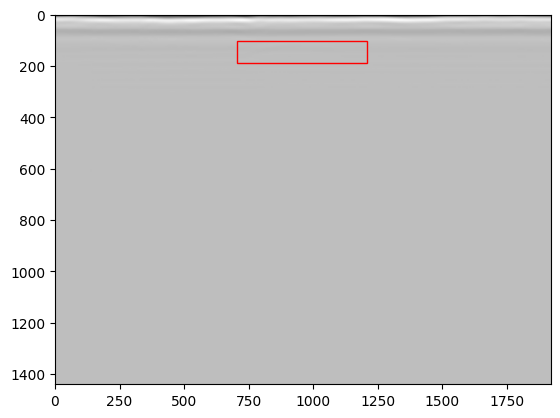

In [51]:
# Verifying the final files created for training
txt_files = glob('obj/*.txt')

num = np.random.randint(0, len(txt_files))

txt_file_path = txt_files[num]
print(txt_file_path)

image_path = txt_file_path[:-3]+'png'
image = Image.open(image_path)

fig, ax = plt.subplots()
ax.imshow(image, aspect='auto', cmap='gray')

with open(txt_file_path, 'r') as file:
    txt_content = file.readlines()

class_id, x_center, y_center, width, height = map(float, txt_content[0].strip().split())

img_width, img_height = image.size

x_center *= img_width
y_center *= img_height
width *= img_width
height *= img_height

x_min = x_center - width / 2
y_min = y_center - height / 2

rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
# ax.axvline(x=x_center, color='r')

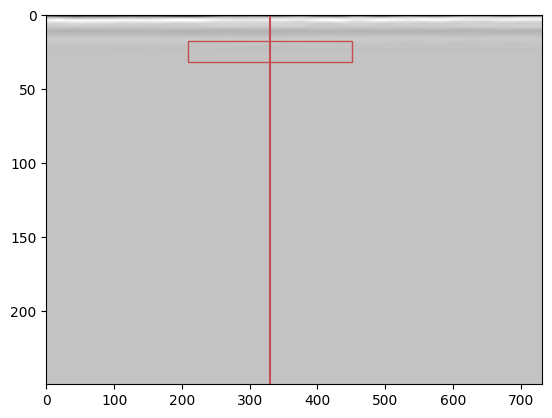

In [78]:
# Printing an example tagging using sgy file instead of the image

sgy_file_num = 1
split_num = 2

sgy_file = sgy_list_from_text_sgy_data_folder[sgy_file_num]
split = each_split[sgy_file_num]

traces = open_sgy_preprocess(sgy_file)

with open(split[split_num][0], 'r') as file:
    txt_content = file.readlines()

img_width, img_height = traces[int(split[split_num][1]):int(split[split_num][2]), :].shape

fig, ax = plt.subplots()
ax.imshow(traces[int(split[split_num][1]):int(split[split_num][2]), :].T, aspect='auto', cmap='gray')
# ax.axis('off')

for line in txt_content:
    class_id, x_center, y_center, width, height = map(float, line.strip().split())

    x_center *= img_width
    y_center *= img_height
    width *= img_width
    height *= img_height

    x_min = x_center - width / 2
    y_min = y_center - height / 2

    rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.axvline(x=x_center, color='r')

# Copy test images to mask_test_images

In [1]:
with open('test.txt', 'r') as file:
    content = file.readlines()

all_test_images = [x[:-1] for x in content]

In [2]:
all_test_images[0]

'data/obj/TunnelNew_64_3_6363_9001__cubic_6640.png'

In [3]:
source_file = 'data/obj/New_64_4_4415_6084__cubic_4724.png'
temp_path = source_file.split('/')[-1]
dest_file = f'mask_test_images/{temp_path}'

In [4]:
all_test_images[0][5:]

'obj/TunnelNew_64_3_6363_9001__cubic_6640.png'

In [8]:
import shutil

for each_test_image in all_test_images:
    source_file = each_test_image[5:]
    temp_path = source_file.split('/')[-1]
    dest_file = f'mask_test_images/{temp_path}'

    # print(f'./darknet detector test data/obj.data cfg/yolov4-custom.cfg training/yolov4-custom_best.weights data/{dest_file} -thresh 0.3')

    shutil.copy(source_file, dest_file)